In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf

In [2]:
mnist=tf.keras.datasets.mnist
(x_train ,y_train),(x_test , y_test)=mnist.load_data()
x_train=tf.keras.utils.normalize(x_train , axis=1)
x_test=tf.keras.utils.normalize(x_test , axis=1)


In [3]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))



In [4]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy' ,metrics=['accuracy'])

In [5]:
model.fit(x_train,y_train,epochs=3 )

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2652 - accuracy: 0.9225
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1085 - accuracy: 0.9666
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0739 - accuracy: 0.9764


In [6]:
loss ,accuracy =model.evaluate(x_test , y_test)
print("loss = ",loss)
print("accuracy = ",accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0907 - accuracy: 0.9718
loss =  0.09067434817552567
accuracy =  0.9718000292778015


1/1 [==============================] - 0s 27ms/step
This digit is probably a 0


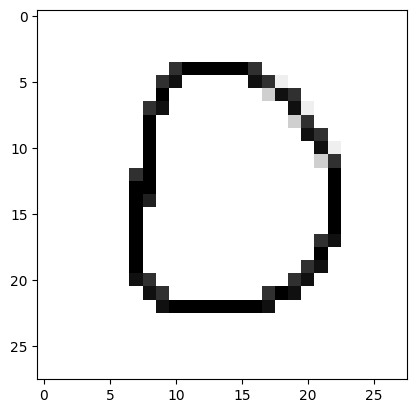

1/1 [==============================] - 0s 42ms/step
This digit is probably a 8


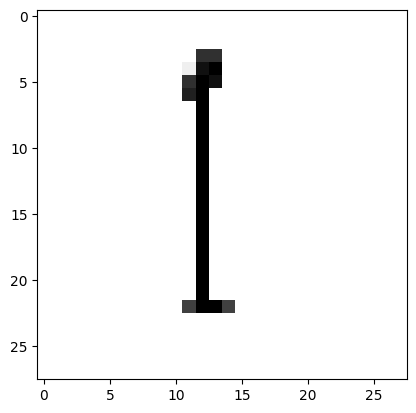

1/1 [==============================] - 0s 28ms/step
This digit is probably a 3


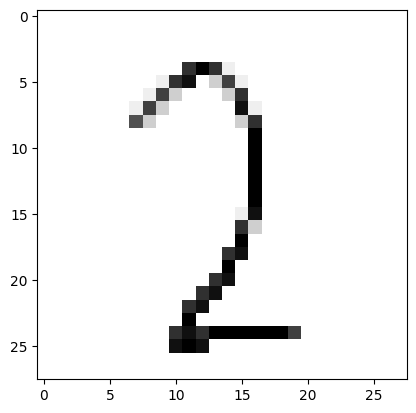

1/1 [==============================] - 0s 26ms/step
This digit is probably a 3


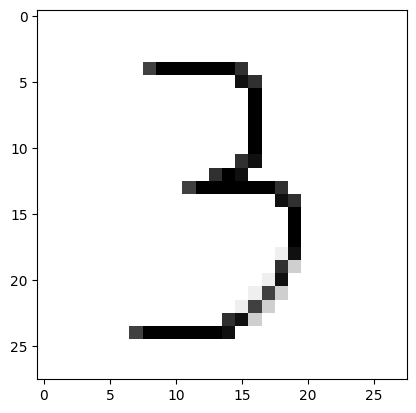

1/1 [==============================] - 0s 32ms/step
This digit is probably a 4


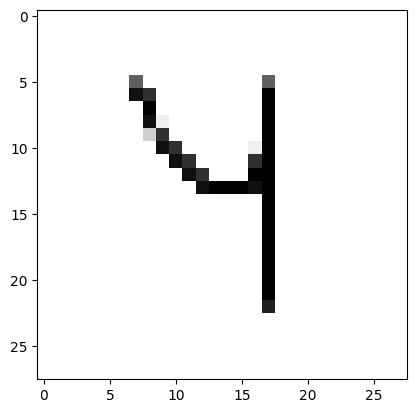

1/1 [==============================] - 0s 30ms/step
This digit is probably a 9


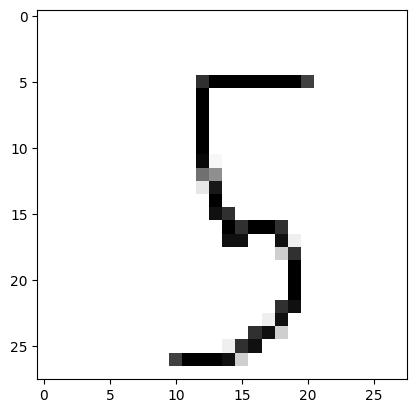

1/1 [==============================] - 0s 33ms/step
This digit is probably a 8


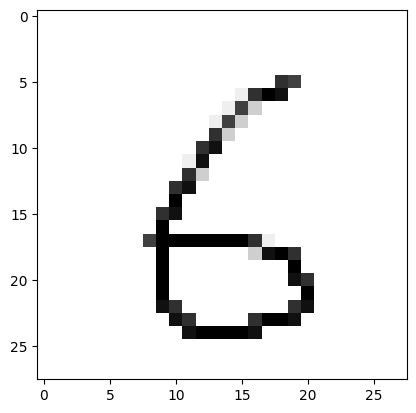

1/1 [==============================] - 0s 30ms/step
This digit is probably a 7


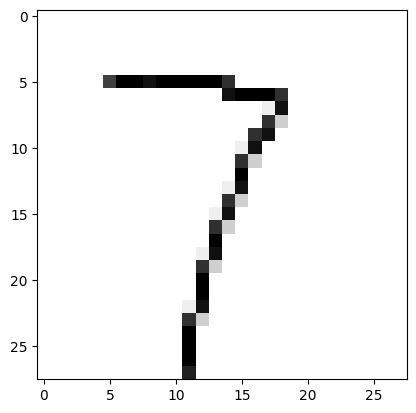

1/1 [==============================] - 0s 40ms/step
This digit is probably a 4


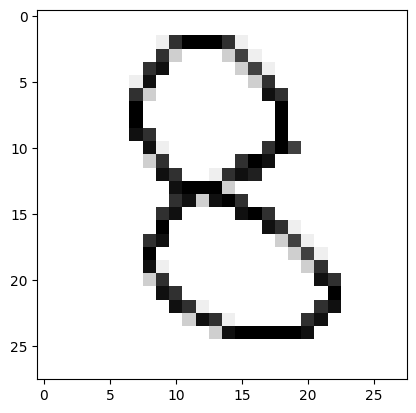

1/1 [==============================] - 0s 28ms/step
This digit is probably a 9


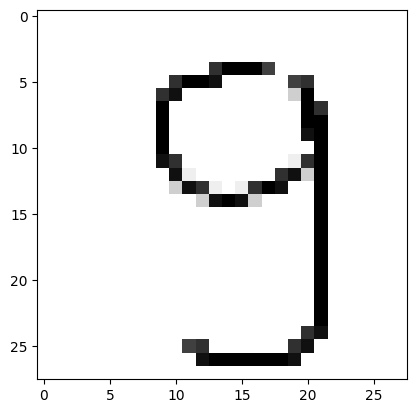

1/1 [==============================] - 0s 31ms/step
This digit is probably a 8


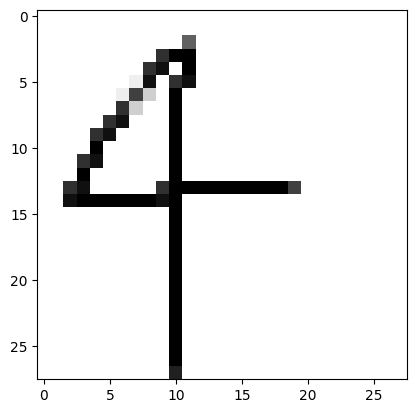

1/1 [==============================] - 0s 28ms/step
This digit is probably a 8


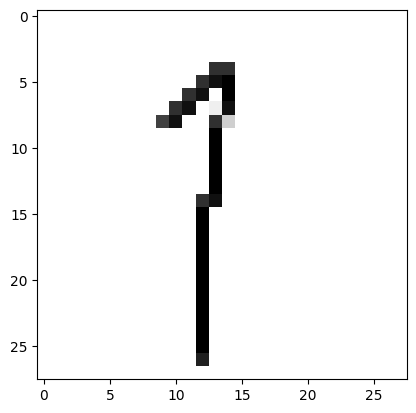

1/1 [==============================] - 0s 25ms/step
This digit is probably a 4


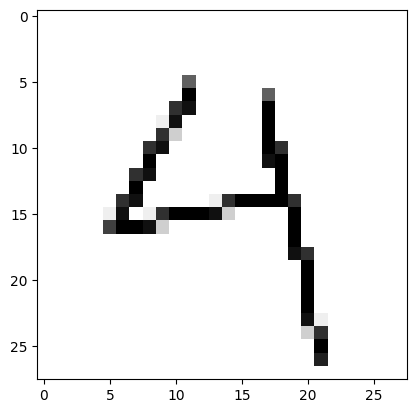

1/1 [==============================] - 0s 24ms/step
This digit is probably a 3


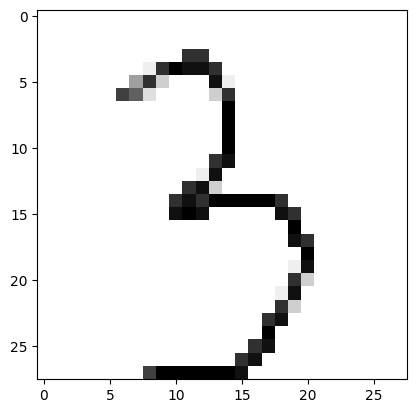

1/1 [==============================] - 0s 25ms/step
This digit is probably a 2


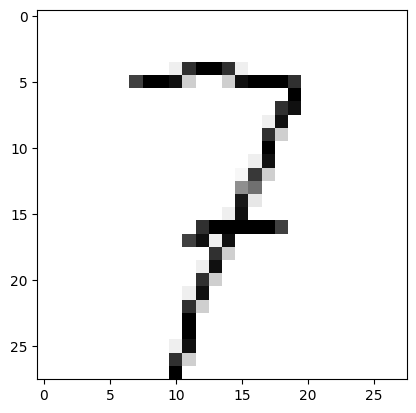

In [9]:
img_num=1
while os.path.isfile(f"digits/digit{img_num}.png"):
    img=cv2.imread(f"digits/digit{img_num}.png")[:,:,0]
    img=np.invert(np.array([img]))
    prediction=model.predict(img)
    print(f"This digit is probably a {np.argmax(prediction)}")
    plt.imshow(img[0],cmap=plt.cm.binary)
    plt.show()
    img_num+=1